# Parámetros de un núcleo gaussiano ...

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()

In [21]:
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[1] == 1]
class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[1] == -1]

In [22]:
batch_size = 150

x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

prediction_grid = tf.placeholder(shape = [None, 2], dtype = tf.float32)

b = tf.Variable(tf.random_normal(shape = [1, batch_size]))

In [23]:
gammas = [1.0, 10.0, 25.0, 100.0]

In [24]:
gamma = tf.constant(-10.0)

dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1, 1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1), [-1, 1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

my_optim = tf.train.GradientDescentOptimizer(0.01)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

loss_vect = []
batch_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    acc_temp = session.run(accuracy, feed_dict = {x_data: rand_x, y_target: rand_y, prediction_grid: rand_x})
    batch_acc.append(acc_temp)
    if (i + 1) % 100 == 0:
        print("Paso # " + str(i + 1) + ", Pérdida = " + str(temp_loss) + ", Precisión = " + str(acc_temp))
        
x_min, x_max = x_vals[:,0].min() - 1, x_vals[:,0].max() + 1
y_min, y_max = x_vals[:,1].min() - 1, x_vals[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]

[grid_prediction] = session.run(prediction, feed_dict = {x_data: x_vals,
                                                         y_target: np.transpose([y_vals]),
                                                         prediction_grid: grid_points})

grid_prediction = grid_prediction.reshape(xx.shape)

Paso # 100, Pérdida = -0.022529125, Precisión = 0.93333334
Paso # 200, Pérdida = -2.2724988, Precisión = 0.98
Paso # 300, Pérdida = -2.2350295, Precisión = 0.94666666
Paso # 400, Pérdida = -2.2520719, Precisión = 1.0
Paso # 500, Pérdida = -2.1293232, Precisión = 0.94666666
Paso # 600, Pérdida = -2.2307653, Precisión = 0.99333334
Paso # 700, Pérdida = -2.299075, Precisión = 0.97333336
Paso # 800, Pérdida = -2.3099875, Precisión = 0.96
Paso # 900, Pérdida = -2.3896637, Precisión = 0.98
Paso # 1000, Pérdida = -2.0932837, Precisión = 0.93333334


ValueError: x and y must have same first dimension, but have shapes (50,) and (150,)

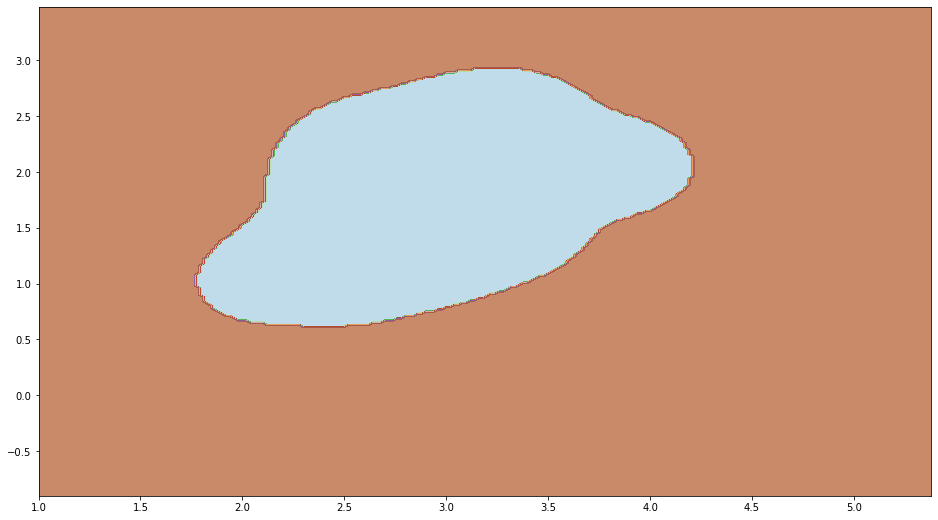

In [25]:
plt.figure(figsize = (16, 9))
plt.contourf(xx, yy, grid_prediction, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, "ro", label = "Iris Setosa")
plt.plot(class2_x, class2_y, "rx", label = "Iris No Setosa")
plt.title("SVM Gaussiano con Gamma = 10")
plt.xlabel("Longitud de Pétalos")
plt.ylabel("Anchura de Sépalos")
plt.legend(loc = "lower right")
plt.show()